In [529]:
using Flux
using Flux: params
using BSON: @load
using Plots
using MLDatasets
using Images

In [624]:
include("./vaemodel.jl")

trainVAE (generic function with 1 method)

In [625]:
a = [1.0f0, 2.0f0]
zero(a)

2-element Vector{Float32}:
 0.0
 0.0

In [698]:
@load "./models/tinyv9intrain3" model

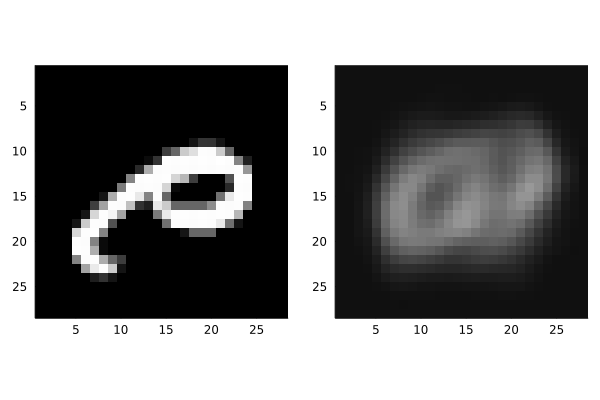

In [717]:
img = MNIST(Float32, :test).features[:, :, convert(Integer, ceil(5000.0*rand()))]
recovered_img = reshape(model(reshape(img, :), 100), 28, 28)
plot(
    plot(colorview(Gray, img)),
    plot(colorview(Gray, recovered_img))
)